In [2]:
import numpy as np
import pandas as pd
import sklearn as sns
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [4]:
data = pd.read_csv('G:/Cources/Machine Learning/Practice/Datasets/archive/crudeSuicideRates.csv')
data.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2016,Crude suicide rates (per 100 000 population),Both sexes,0.0
1,Afghanistan,2016,Crude suicide rates (per 100 000 population),Male,0.0
2,Afghanistan,2016,Crude suicide rates (per 100 000 population),Female,0.0
3,Afghanistan,2015,Crude suicide rates (per 100 000 population),Both sexes,4.8
4,Afghanistan,2015,Crude suicide rates (per 100 000 population),Male,7.8


In [5]:
data['Indicator'].unique()

array(['Crude suicide rates (per 100 000 population)'], dtype=object)

In [6]:
Data = data.drop(['Indicator'], axis=1)

In [7]:
column_names = ['Country','Period','Gender','S_rate']

In [8]:
Data.columns = column_names

In [9]:
Data.head()

,Country,Period,Gender,S_rate
0,Afghanistan,2016,Both sexes,0.0
1,Afghanistan,2016,Male,0.0
2,Afghanistan,2016,Female,0.0
3,Afghanistan,2015,Both sexes,4.8
4,Afghanistan,2015,Male,7.8


In [10]:
Data.tail()

,Country,Period,Gender,S_rate
2740,Zimbabwe,2005,Male,21.7
2741,Zimbabwe,2005,Female,6.4
2742,Zimbabwe,2000,Both sexes,12.9
2743,Zimbabwe,2000,Male,20.6
2744,Zimbabwe,2000,Female,5.5


In [11]:
Data['Period'].unique()

array([2016, 2015, 2010, 2005, 2000], dtype=int64)

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 4 columns):
Country    2745 non-null object
Period     2745 non-null int64
Gender     2745 non-null object
S_rate     2745 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 85.9+ KB


In [13]:
Data.describe()

,Period,S_rate
count,2745.000000,2745.000000
mean,2009.200000,8.129909
std,6.047588,9.560630
min,2000.000000,0.000000
25%,2005.000000,1.900000
50%,2010.000000,5.700000
75%,2015.000000,11.400000
max,2016.000000,93.500000


In [14]:
mean = 8.129909

In [15]:
Data.ndim

2

In [16]:
Data.shape

(2745, 4)

In [17]:
Data.size

10980

In [18]:
Data.columns

Index(['Country', 'Period', 'Gender', 'S_rate'], dtype='object')

In [19]:
Data.isnull().sum()

Country    0
Period     0
Gender     0
S_rate     0
dtype: int64

In [20]:
Data.isna()

,Country,Period,Gender,S_rate
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2740,False,False,False,False
2741,False,False,False,False
2742,False,False,False,False
2743,False,False,False,False


In [21]:
fill = np.nanmean(Data['S_rate'])
fill

8.129908925318762

In [22]:
Data['S_rate']=Data['S_rate'].fillna(fill)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 4 columns):
Country    2745 non-null object
Period     2745 non-null int64
Gender     2745 non-null object
S_rate     2745 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 85.9+ KB


In [23]:
import pandas_profiling

In [24]:
pandas_profiling.ProfileReport(Data)

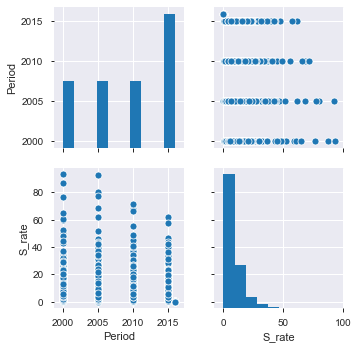

In [25]:
sns.pairplot(Data)

# Label Encoding

In [26]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

Data['Country']=label_encoder.fit_transform(Data['Country'])
Data['Gender'] = label_encoder.fit_transform(Data['Gender'])

In [27]:
Data['Country'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        43,  39,  40,  41,  42,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 162, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [28]:
Data['Gender'].unique()

array([0, 2, 1], dtype=int64)

In [29]:
Data.head()

,Country,Period,Gender,S_rate
0,0,2016,0,0.0
1,0,2016,2,0.0
2,0,2016,1,0.0
3,0,2015,0,4.8
4,0,2015,2,7.8


In [30]:
Data['S_rate'].unique()

array([ 0. ,  4.8,  7.8,  1.5,  5.1,  8.6,  1.4,  6.3, 10.8,  5.7, 10. ,
        1. ,  6. ,  7.6,  4.4,  9.5,  6.1,  6.7,  7.7,  5.5,  7.4,  3.5,
        3.2,  1.7,  3.3,  4.9,  1.8,  3.8,  5.3,  2.2,  4.1,  5.6,  2.5,
        5. ,  7.5,  2.6,  8.7,  2.8,  7.2, 11. ,  3.7,  7.9, 11.9,  4. ,
        0.8,  0.3,  0.5,  1.2,  2.4,  2. ,  4.2,  0.1,  8.8, 14.5,  3.4,
       14.3,  9. , 14.4,  3.9, 15.6,  7. , 11.5,  3. , 10.1,  1.3, 13.8,
       20.4, 12.5, 18.6, 12.3, 13.2, 16. , 24.9, 25. , 17.3, 26.6, 20. ,
       30. , 10.5,  2.7,  4.3,  1.1,  3.1,  5.2,  0.9,  0.6,  0.7,  5.9,
        8.3,  6.9,  9.9,  9.4,  4.7,  6.4,  8.5,  4.5,  8.2,  2.1, 26.3,
       47. , 38.2, 68.1, 45.1, 80. , 43.1, 76.6, 13.5, 20.1, 27. , 13.4,
       21.3, 29.3, 13.6, 21.2, 30.6, 12.1, 22.7, 31.9, 14. ,  8. ,  1.9,
       13.9,  9.6,  9.7, 11.6, 14.1, 11.1,  8.4, 12.2, 14.9,  9.2, 12.4,
       15.2, 15.9, 17.7, 10.4, 15.3, 19.2, 11.4, 16.4, 12.7,  8.9, 12.9,
        9.3, 15. , 10.7, 14.8,  4.6, 17.1, 12.6, 11

In [31]:
x_data = Data.drop(['S_rate'], axis=1).astype(float)

In [32]:
x_data.head()

,Country,Period,Gender
0,0.0,2016.0,0.0
1,0.0,2016.0,2.0
2,0.0,2016.0,1.0
3,0.0,2015.0,0.0
4,0.0,2015.0,2.0


In [33]:
x_data.tail()

,Country,Period,Gender
2740,183.0,2005.0,2.0
2741,183.0,2005.0,1.0
2742,183.0,2000.0,0.0
2743,183.0,2000.0,2.0
2744,183.0,2000.0,1.0


In [34]:
y_data = Data['S_rate']

In [35]:
x_data.shape

(2745, 3)

In [36]:
y_data.shape

(2745,)

In [58]:
data.columns

Index(['Location', 'Period', 'Indicator', 'Dim1', 'First Tooltip'], dtype='object')

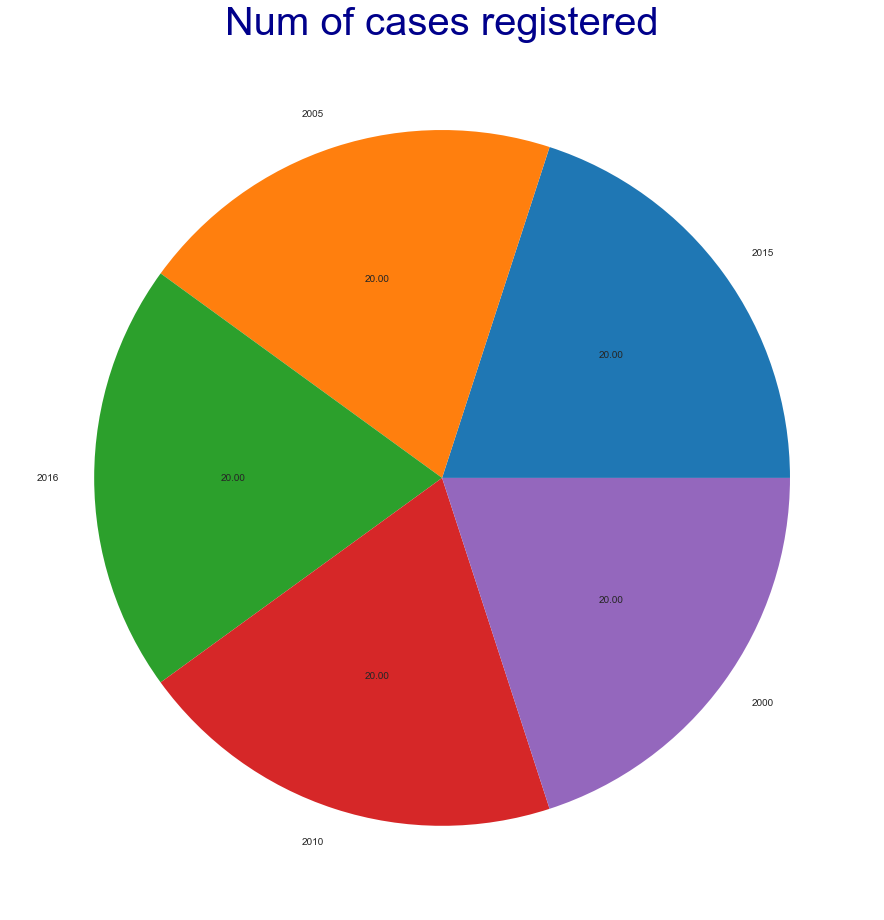

In [63]:
plt.figure(figsize=(16,16))

ax=Data.Period.value_counts()[:10]
labels=Data['Period'].value_counts()[:10].index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title('Num of cases registered',fontsize=40,color='darkblue')
plt.show()

In [64]:
Data.columns

Index(['Country', 'Period', 'Gender', 'S_rate'], dtype='object')

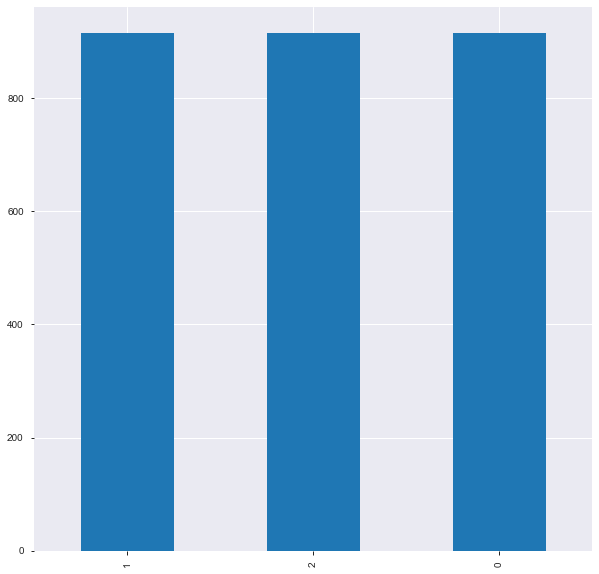

In [67]:
plt.figure(figsize=(10,10))
ax= Data.Gender.value_counts()[:10]
ax.plot(kind='bar')

# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [38]:
li = LinearRegression()

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size=0.20)

In [40]:
x_train.shape

(2196, 3)

In [41]:
y_train.shape

(2196,)

In [42]:
li.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
train_score = li.score(x_train, y_train)
train_score

0.11230066555266917

In [44]:
test_score = li.score(x_test,y_test)
test_score

0.09312915933214683

In [45]:
New_pred = li.predict(x_test)
New_pred

array([13.78534249,  4.68221297, 12.58566585,  7.19163096,  5.23317428,
        6.11647933,  7.42280273,  5.24202832, 12.07852238,  6.78082648,
       13.96416327,  3.50105636,  5.72500682,  7.61128949,  9.6415993 ,
        9.92191295,  7.93477919,  6.2131392 ,  8.55308152, 10.06658187,
       12.03019244, 10.26956762, 10.54988126, 12.00570658,  2.87841209,
       12.30051921,  6.08748136,  9.83491906, 10.14874277,  5.63317993,
        7.23512791, 10.25990163, 13.89166836,  9.41960247, 12.13168532,
        7.83296543,  9.68541714,  4.57588711,  5.07368548,  3.14422676,
        9.72408109,  3.05723287,  9.20695074, 11.91420059,  4.87069973,
        7.78495638,  9.48726439,  5.64316681, 10.21640468, 12.17002838,
        7.46114579,  7.30681087, 11.585557  ,  5.08818446,  3.09589682,
        8.13261105,  3.33271352, 11.5130621 ,  2.7914182 , 14.34113679,
        7.23914896,  9.21661673, 12.69682471, 10.58371222, 10.85919287,
        8.53374954,  5.97148951,  5.90866059,  8.57724649,  9.45

In [46]:
df = pd.DataFrame({'actual Data':y_test,
                   'New_prediction':New_pred 
                  })
df

,actual Data,New_prediction
88,15.6,13.785342
377,0.0,4.682213
2174,2.5,12.585666
2371,0.0,7.191631
2102,0.0,5.233174
...,...,...
1392,3.0,10.472553
1560,0.0,3.197390
1758,12.2,3.718541
2256,4.3,6.164809


Text(0, 0.5, 'Predicted Y')

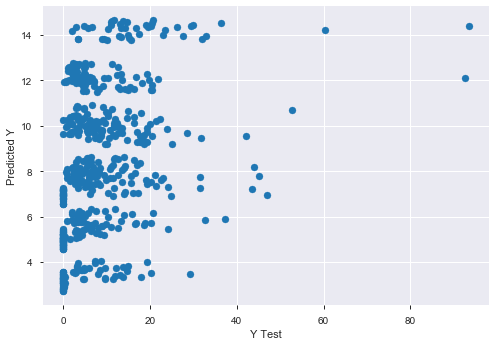

In [47]:
plt.scatter(y_test,New_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

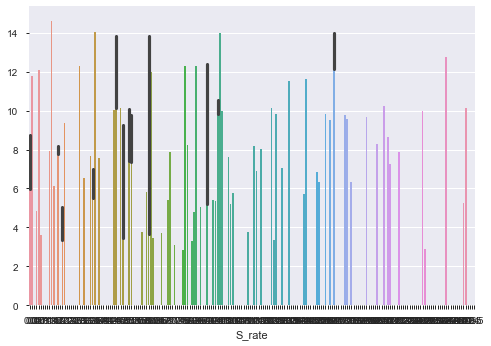

In [74]:
sns.barplot(y_test,New_pred)

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [54]:
r2_score(y_test,New_pred)

0.09312915933214683

In [55]:
mean_squared_error(y_test, New_pred)

90.68269607816153

In [56]:
mean_absolute_error(y_test, New_pred)

6.238032437881448

In [129]:
li_score=r2_score(y_test,New_pred)*100

# Ridge Regression

In [89]:
from sklearn.linear_model import Ridge
rr=Ridge(max_iter=1000, normalize=True)
rr

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [90]:
rr.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [91]:
print(rr.score(x_train,y_train))
print(rr.score(x_test,y_test))

0.08402384433728105
0.07154684374298981


In [92]:
rr_pred=rr.predict(x_test)

In [93]:
pd.DataFrame({'Acutual_data':y_test,'New_data':rr_pred})

,Acutual_data,New_data
88,15.6,10.900647
377,0.0,6.369820
2174,2.5,10.329799
2371,0.0,7.635456
2102,0.0,6.662092
...,...,...
1392,3.0,9.274394
1560,0.0,5.647707
1758,12.2,5.909627
2256,4.3,7.134622


In [94]:
from sklearn.metrics import r2_score
rr_score=r2_score(y_test,rr_pred)*100
print("Accuracy score for RidgeR :",rr_score)

Accuracy score for RidgeR : 7.154684374298981


# Lasso

In [107]:
from sklearn.linear_model import Lasso
ls=Lasso(random_state=True)
ls

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=True,
      selection='cyclic', tol=0.0001, warm_start=False)

In [108]:
ls.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=True,
      selection='cyclic', tol=0.0001, warm_start=False)

In [109]:
print(ls.score(x_train,y_train))
print(ls.score(x_test,y_test))

0.09516132835508606
0.06803680570015669


In [110]:
ls_pred=ls.predict(x_test)

In [111]:
pd.DataFrame({'Acutual_data':y_test,'New_data':ls_pred})

,Acutual_data,New_data
88,15.6,12.034390
377,0.0,4.895817
2174,2.5,12.299947
2371,0.0,5.873379
2102,0.0,5.418753
...,...,...
1392,3.0,11.698531
1560,0.0,4.890732
1758,12.2,5.379293
2256,4.3,7.670721


In [112]:
from sklearn.metrics import r2_score

ls_score=r2_score(y_test,ls_pred)*100
print("Accuracy score for Lasso :",ls_score)

Accuracy score for Lasso : 6.803680570015668


# Random Forest Regressor

In [116]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [117]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [118]:
print(rfr.score(x_train,y_train))
print(rfr.score(x_test,y_test))

0.9770809254042031
0.8289496715488003


In [119]:
rfr_pred=rfr.predict(x_test)

In [120]:
pd.DataFrame({'Acutual_data':y_test,'New_data':rfr_pred})

,Acutual_data,New_data
88,15.6,10.549
377,0.0,0.000
2174,2.5,7.439
2371,0.0,0.000
2102,0.0,0.000
...,...,...
1392,3.0,11.162
1560,0.0,0.000
1758,12.2,12.505
2256,4.3,6.049


In [121]:
from sklearn.metrics import r2_score

rfr_score=r2_score(y_test,rfr_pred)*100
print("Accuracy score for RandomForest :",rfr_score)

Accuracy score for RandomForest : 82.89496715488002


# Support vector Regressor

In [122]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [123]:
print(svr.score(x_train,y_train))
print(svr.score(x_test,y_test))

-0.062380231066966774
-0.07157493152399219


In [124]:
svr_pred=svr.predict(x_test)

In [125]:
pd.DataFrame({'Acutual_data':y_test,'New_data':svr_pred})

,Acutual_data,New_data
88,15.6,5.620423
377,0.0,5.589711
2174,2.5,5.766301
2371,0.0,5.730511
2102,0.0,5.710331
...,...,...
1392,3.0,5.712229
1560,0.0,5.673162
1758,12.2,5.690177
2256,4.3,5.740221


In [127]:
from sklearn.metrics import r2_score

svr_score=r2_score(y_test,svr_pred)*100
print("Accuracy score for SVR :",svr_score)

Accuracy score for SVR : -7.157493152399219


In [130]:
pd.DataFrame({"Model Names":['Linear Reg','Ridge Reg','Lasso Reg','RandomForest Reg','Support Vector Reg'],
            "Accuracy socre":[li_score,rr_score,ls_score,rfr_score,svr_score]})

,Model Names,Accuracy socre
0,Linear Reg,9.312916
1,Ridge Reg,7.154684
2,Lasso Reg,6.803681
3,RandomForest Reg,82.894967
4,Support Vector Reg,-7.157493


In [132]:
rfr.predict([[1,0,27]])

array([7.989])

In [133]:
sample=pd.DataFrame({"Actual Ratin":y_test,
             "Predicted Rating":np.round(rfr_pred,2)})
sample

,Actual Ratin,Predicted Rating
88,15.6,10.55
377,0.0,0.00
2174,2.5,7.44
2371,0.0,0.00
2102,0.0,0.00
...,...,...
1392,3.0,11.16
1560,0.0,0.00
1758,12.2,12.50
2256,4.3,6.05


In [134]:
sample.to_csv("Model_Prediction_Sample.csv",index=False)